### Are there any age or gender or topic based correlations by location in the posts? `(Todd)`

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm

In [55]:
df = pd.read_csv('../Datasets/Master_Dataset_GeoTopic.csv')

# set the width of the 'Narrative' column to 100 characters
pd.options.display.max_colwidth = 100

In [56]:
# replace df with your original DataFrame
df = df.loc[:, ["Gender", "Age", "Interest", "GeoTopic Name"]]

In [57]:
# df.sample(20)[['Narrative', 'GeoTopic Name', 'GeoTopic Latitude', 'GeoTopic Longitude']]
df.sample(5)

,Gender,Age,Interest,GeoTopic Name
22887,male,23,"Technology, History, Food, Entertainment, Sports, Environment, Science, Inequality, Education, H...",NaN
17851,female,22,"Technology, History, Food, Entertainment, Sports, Environment, Science, Inequality, Education, H...",NaN
18095,female,22,"rick and morty, hollywood, Entertainment, deadline, comdey series",NaN
21701,male,21,"rath yatra, some memories of rath yatra.",NaN
19594,male,21,agartala,NaN


In [58]:
# df = df.rename(columns={'GeoTopic Name': 'Location'})
df['Gender'] = df['Gender'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Interest'] = df['Interest'].astype(str)
df['GeoTopic Name'] = df['GeoTopic Name'].astype(str)

In [59]:
# Replace negative values with their absolute value
df['Age'] = np.abs(df['Age'])

# Replace values greater than 80 with 80
df['Age'] = np.where(df['Age'] > 80, 80, df['Age'])

In [60]:
df_AgeLocation = df.loc[:, ["Age", "GeoTopic Name"]]
df_GenderLocation = df.loc[:, ["Gender", "GeoTopic Name"]]
df_InterestLocation = df.loc[:, ["Interest", "GeoTopic Name"]]

In [61]:
# remove rows with 'GeoTopic Name' of 'nan'
df_AgeLocation = df_AgeLocation[df_AgeLocation['GeoTopic Name'] != 'nan']

# count the frequency of each GeoTopic Name
counts = df_AgeLocation['GeoTopic Name'].value_counts()

# filter to include only GeoTopic Names with 10 or more counts
valid_names = counts[counts >= 200].index

# filter the original dataframe using the valid GeoTopic Names
df_AgeLocation = df_AgeLocation[df_AgeLocation['GeoTopic Name'].isin(valid_names)]

In [62]:
# Create Smaller more-workable samples:
# df_AgeLocation = df_AgeLocation.iloc[:10000]
df_GenderLocation = df_GenderLocation.iloc[:1000]
df_InterestLocation = df_InterestLocation.iloc[:1000]

In [63]:
df_AgeLocation.sample(5)

,Age,GeoTopic Name
45031,30,Madrid
53331,21,Paris
63618,25,Los Angeles
34897,63,Milan
86550,12,Commonwealth of Australia


### Correlations
Age vs Location
- 
Gender vs Location
- Pie Charts
    - Male Pie Chart
    - Female Pie CHart
Interest vs Location
- 


# Age vs Location

In [64]:
# create a pivot table
pivot_table = df_AgeLocation.pivot_table(index='Age', columns='GeoTopic Name', aggfunc=len, fill_value=0)

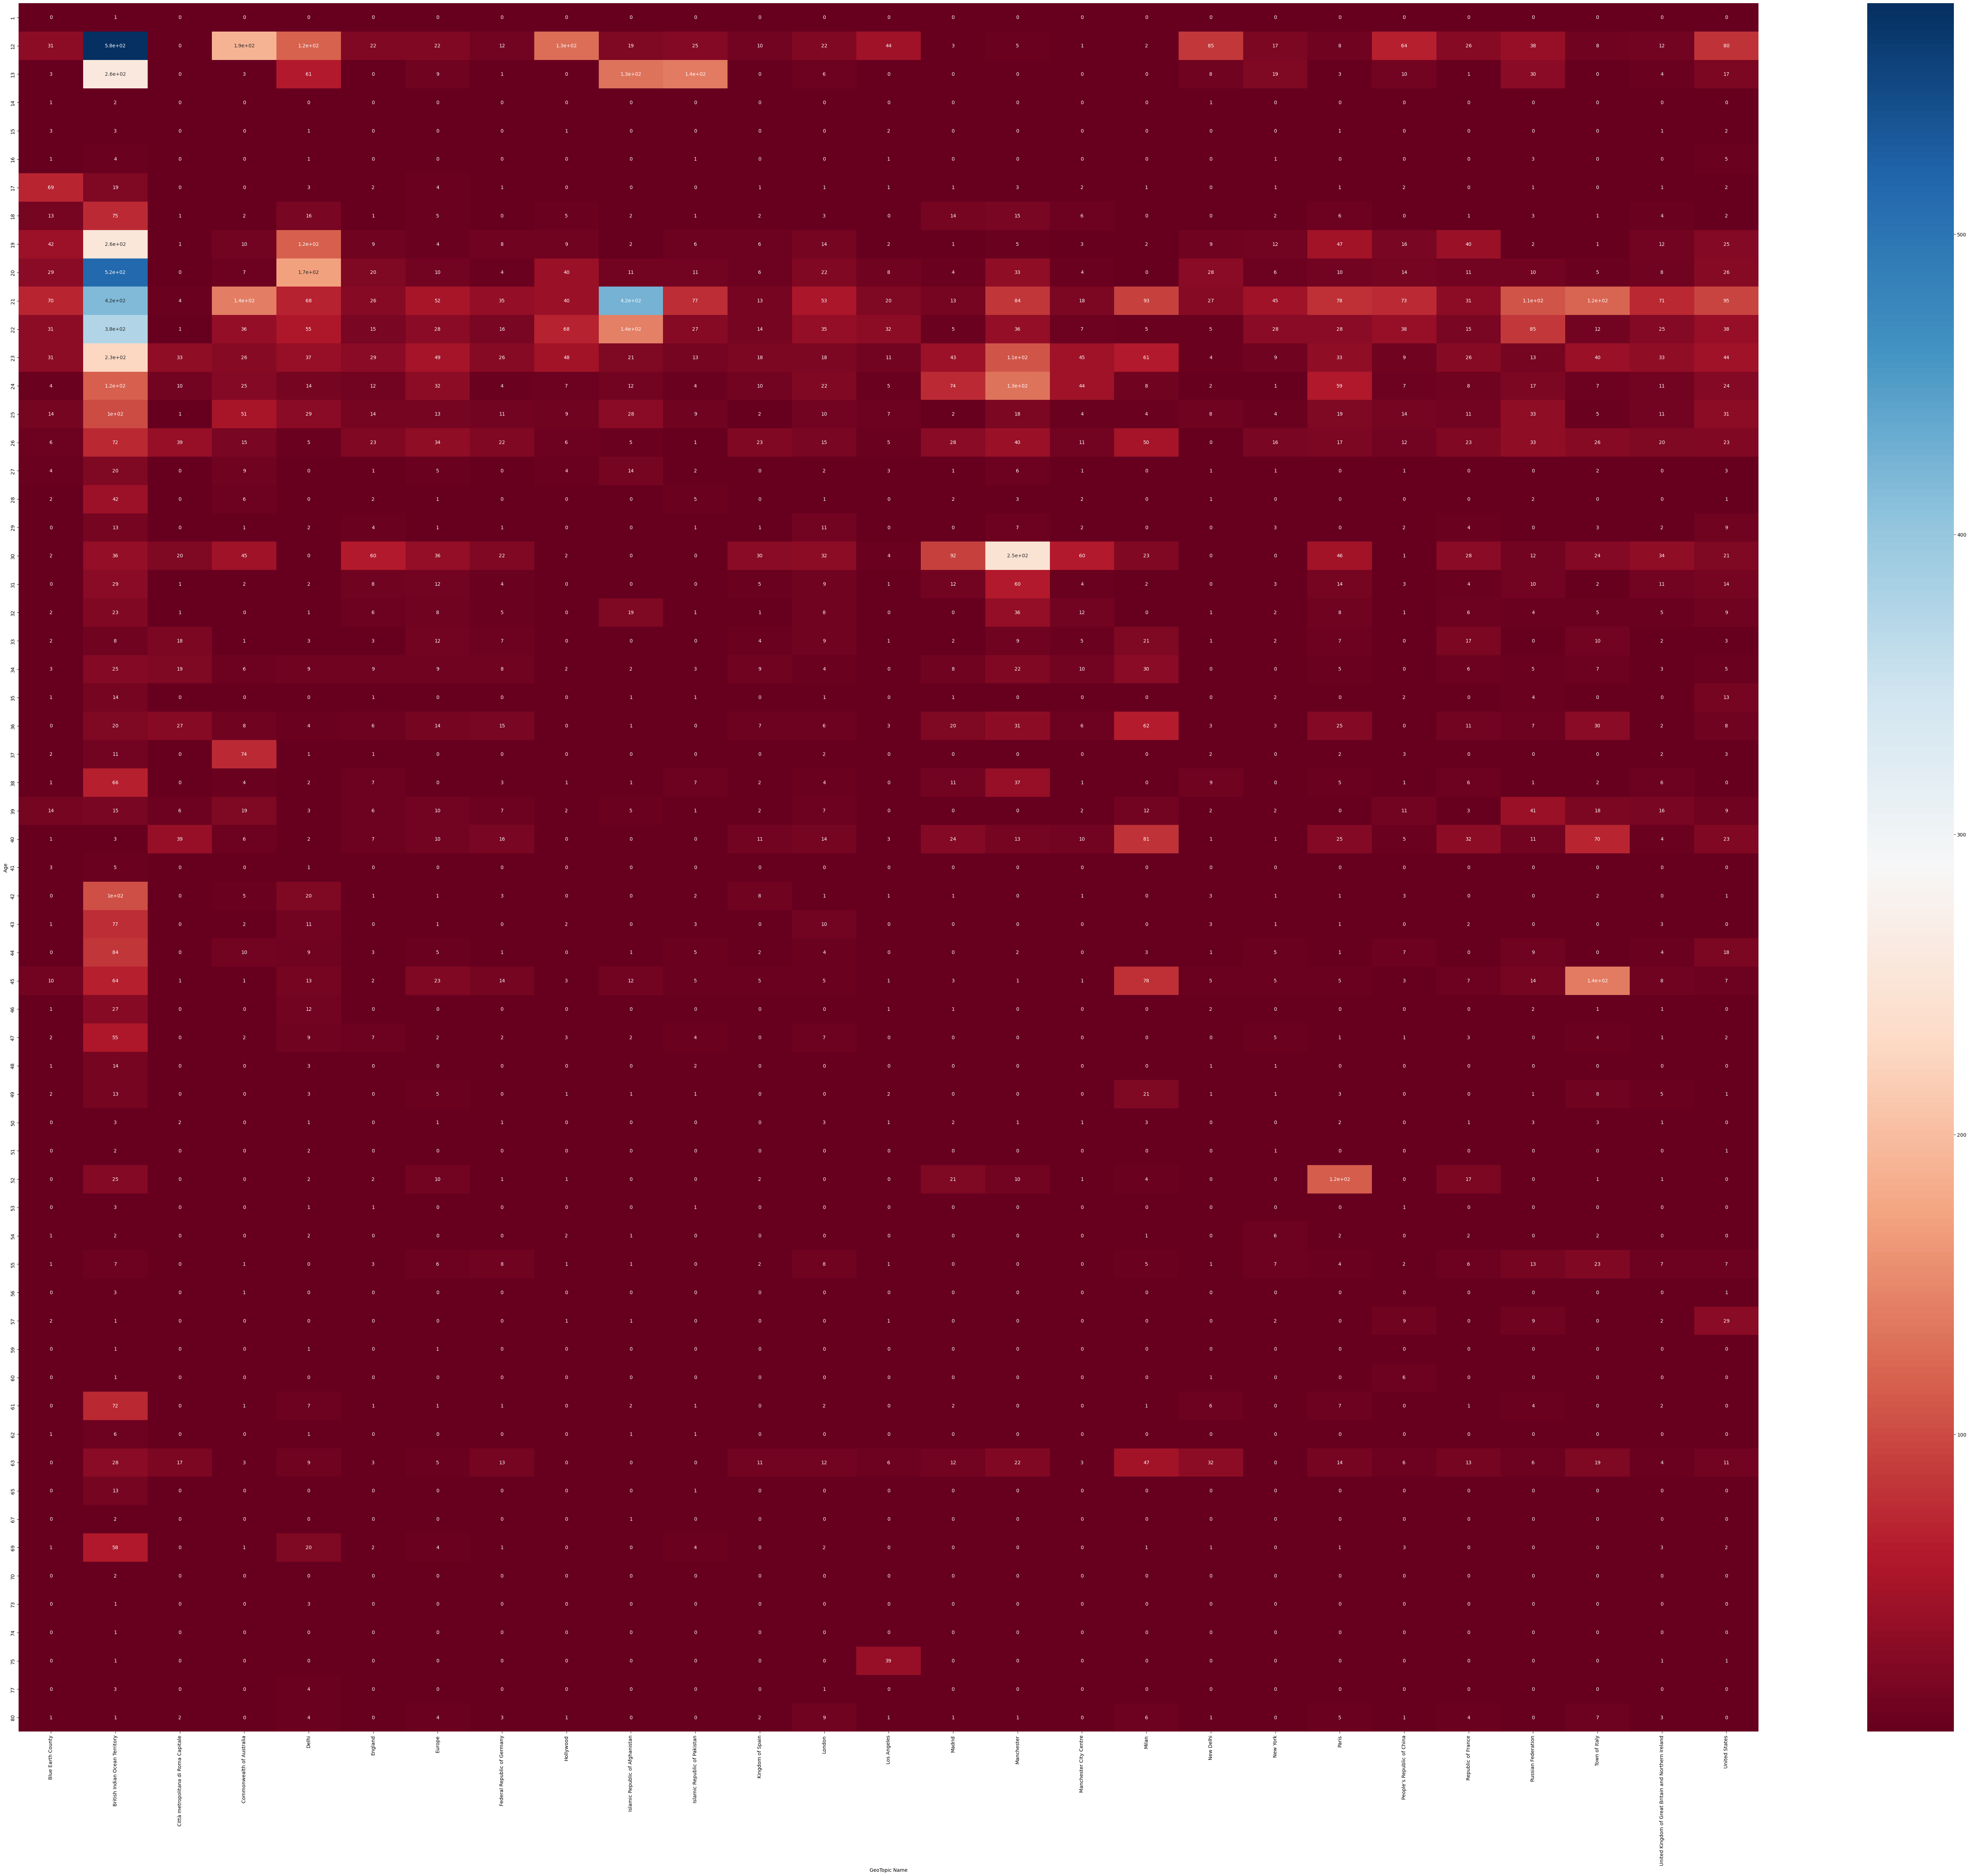

In [65]:
# Set figure size
fig, ax = plt.subplots(figsize=(80, 64))

# create a heatmap
sns.heatmap(pivot_table, annot=True, cmap='RdBu', vmin=1, vmax=pivot_table.values.max())

# Save the chart as a PNG image
fig.savefig('q1_figures/ageVsLocationHeatMap.png')

# Show figure
plt.show()

# Close the figure to free up memory
plt.close(fig)

In [66]:
# break error

SyntaxError: invalid syntax (3724179547.py, line 1)

In [67]:
# Overlapping Bar Graphs

# Get a list of unique GeoTopic Names
geos = df['GeoTopic Name'].unique()

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Loop through each GeoTopic Name
for i, geo in enumerate(geos):
    # Get the age counts for this GeoTopic Name
    age_counts = df[df['GeoTopic Name'] == geo]['Age']

    # Filter the data to exclude any ages greater than 80
    age_counts = age_counts[age_counts <= 80]

    # Calculate the mean and standard deviation for this GeoTopic Name
    mean = age_counts.mean()
    std = age_counts.std()

    # Filter the data to exclude any points more than 2 standard deviations away from the mean
    age_counts_filtered = age_counts[(age_counts >= mean - 2*std) & (age_counts <= mean + 2*std)]

    # Set the bar width
    width = 0.35

    # Set the x position of the bars
    x_pos = i * width

    # Create a bar chart using matplotlib
    ax.bar(age_counts_filtered.unique() + x_pos, age_counts_filtered.value_counts(), width, label=geo)

# Set the chart title and axes labels
ax.set_title('Age distributions for multiple countries')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Set the x-ticks and x-tick labels
ax.set_xticks(df['Age'].unique())
ax.set_xticklabels(df['Age'].unique())

# Set the x-axis limits
ax.set_xlim(0, 80)

# Add a legend to the chart
ax.legend()

# Save the chart as a PNG image
fig.savefig('q1_figures/multiple_countries_filtered.png')

# Close the figure to free up memory
plt.close(fig)

In [ ]:
break

In [ ]:
# Individual GeoTopic Location Bar Graphs

# Loop through each GeoTopic Name
for geo in df_AgeLocation['GeoTopic Name'].unique():
    # Get the age counts for this GeoTopic Name
    age_counts = df[df['GeoTopic Name'] == geo]['Age'].value_counts().sort_index()

    # Create a bar chart using matplotlib
    fig, ax = plt.subplots()
    ax.bar(age_counts.index, age_counts.values)

    # Set the chart title and axes labels
    ax.set_title('Age distribution for ' + geo)
    ax.set_xlabel('User Age')
    ax.set_ylabel('Age Count')

    # Save the chart as a PNG image
    fig.savefig('q1_figures/' + geo + '.png')

    # Close the figure to free up memory
    plt.close(fig)

# Gender vs Location

# Interest vs Location